**PREPARING THE DATA**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [88]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.linear_model import Ridge


from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
# Read in the dataset
df = pd.read_csv('Advertising.csv')

In [37]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [39]:
# Seperate the features and labels
X = df.drop('sales', axis=1)
y = df['sales']

In [40]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [41]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [43]:
# Create an instance of a poly converter
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [44]:
poly_features = poly_converter.fit_transform(X)

In [45]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [47]:
# Perfrom train test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 9), (60, 9), (140,), (60,))

In [49]:
# Create an instance of a standard scaler for data scaler
scaler = StandardScaler()

In [50]:
# fit transform the scaler on the training dataset
scaled_X_train = scaler.fit_transform(X_train)

In [51]:
scaled_X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ..., -0.59023161,
         0.41659155,  1.6137853 ],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  1.4978238 ,
         2.46478013,  2.08205295],
       [-0.84811893, -1.58789957, -1.02319564, ..., -1.05826214,
        -0.90147492, -0.74882387],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -1.03502374,
        -0.73652035, -0.03590138],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.26199091,
        -0.79680416, -0.78714505],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.32216251,
         0.92114819,  0.76625296]])

In [52]:
# Create the transformed version of the scaled training X features
scaled_X_test = scaler.transform(X_test)

In [53]:
scaled_X_test

array([[-9.13394717e-01,  1.76259419e+00,  6.81685579e-01,
        -9.63975055e-01,  1.52122095e-02, -2.93048209e-01,
         2.31532893e+00,  1.56001049e+00,  3.69910106e-01],
       [ 1.23121149e+00,  2.36559587e-01, -1.19601922e+00,
         1.38103193e+00,  9.76521639e-01, -6.80562258e-01,
        -5.79325829e-02, -7.40162021e-01, -7.79189389e-01],
       [-4.60024728e-01, -4.07766136e-01,  3.50051150e-01,
        -6.82242743e-01, -5.06457342e-01, -1.10940195e-01,
        -6.39722074e-01, -1.69172158e-01,  3.57554301e-02],
       [-4.96816533e-01,  1.65407618e+00,  9.47927303e-01,
        -7.09383526e-01,  4.86260118e-01,  1.37061544e-01,
         2.10033570e+00,  1.77735495e+00,  6.78908133e-01],
       [-1.42610633e+00,  8.05649381e-02, -1.35015916e+00,
        -1.14433859e+00, -8.66050574e-01, -9.38134722e-01,
        -2.21679679e-01, -8.42466779e-01, -7.93375596e-01],
       [-1.56971305e+00, -5.02719400e-01, -4.11306765e-01,
        -1.16855131e+00, -1.00646472e+00, -8.680574

**CREATE THE MODEL**

**L2 RIDGE REGRESSION MODEL**

In [55]:
# Create an instance of the ridge regression model
model = Ridge(alpha=10)

In [56]:
# Fit the model to the scaled X train dataset
model.fit(scaled_X_train, y_train)

Ridge(alpha=10)

In [57]:
# Predict on the test data
pred = model.predict(scaled_X_test)

In [58]:
pred

array([14.32673455, 19.25815758, 11.69469548, 16.42500182,  9.09129244,
        7.95797212, 20.27422814, 17.02545533, 10.00958252, 19.71986909,
       10.88611604, 13.43439248, 12.17979897, 22.64359896, 18.80918807,
        9.85358071, 13.1492644 ,  8.9062176 ,  8.72869048, 21.25100547,
        8.26080736, 18.64293453, 27.44683809, 24.6589422 ,  9.06960489,
       11.71388664, 21.00884242,  8.9941525 , 12.1779096 ,  9.78252415,
        9.28573542, 19.79102624, 10.35880689,  7.49474714, 17.57121911,
        8.96827085, 10.00450626,  9.31295841,  8.96428346, 10.49576719,
       11.06103312, 10.08369606, 10.68350214,  8.13453698, 11.44235603,
       10.37485094,  8.24553957, 15.55759714, 12.79840424, 21.99415126,
       11.14003461, 13.06866653, 15.47679074, 11.36058689, 11.55584049,
        7.15311399, 24.74437741, 11.02151242, 17.59760827, 15.11048175])

In [60]:
# Obtain the coefficient and alpha of the model
model.coef_

array([ 2.0253565 ,  0.57587147,  0.02372659, -0.32734244,  2.93152785,
        0.28880115,  0.21228042,  0.11181648, -0.29031937])

In [61]:
# Evaluate the error
error = y_test - pred

In [62]:
error

37     0.373265
109    0.541842
31     0.205305
89     0.274998
66     0.408708
119   -1.357972
54    -0.074228
74    -0.025455
145    0.290417
142    0.380131
148    0.013884
112    0.665608
174   -0.679799
55     1.056401
141    0.390812
149    0.246419
25    -1.149264
34     0.593782
170   -0.328690
39     0.248995
172   -0.660807
153    0.357065
175   -0.446838
61    -0.458942
65     0.230395
50    -0.313887
42    -0.308842
129    0.705848
179    0.422090
2     -0.482524
12    -0.085735
133   -0.191026
90     0.841193
22    -1.894747
41    -0.471219
32     0.631729
125    0.595494
196    0.387042
158   -1.664283
180    0.004233
16     1.438967
186    0.216304
144    0.716498
121   -1.134537
80     0.357644
18     0.925149
78    -2.945540
48    -0.757597
4      0.101596
15     0.405849
1     -0.740035
43    -0.168667
102   -0.676791
164    0.539413
9     -0.955840
155   -3.953114
36     0.655623
190   -0.221512
33    -0.197608
45    -0.210482
Name: sales, dtype: float64

In [64]:
# Evaluate the error metrics
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

In [66]:
MAE

0.6296447027356389

In [67]:
MSE

0.833294662717574

In [68]:
RMSE

0.9128497481609852

In [71]:
# Evaluate the optimal degree for the Ridge regression model for model complexity
train_rmse = []
test_rmse = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    model = Ridge(alpha=10)
    model.fit(scaled_X_train, y_train)
    
    train_pred = model.predict(scaled_X_train)
    test_pred = model.predict(scaled_X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    trainrmse = np.sqrt(train_mse)
    testrmse = np.sqrt(test_mse)
    
    train_rmse.append(trainrmse)
    test_rmse.append(testrmse)

In [72]:
train_rmse

[1.7623603170643585,
 0.9402742333196971,
 0.8491805208255256,
 0.8400569899582561,
 0.8432270116289926,
 0.8384717123054772,
 0.8278950255144404,
 0.8169749217562654,
 0.8089591050706401]

In [73]:
test_rmse

[1.6069183154075561,
 0.9128497481609852,
 0.8946386461319685,
 0.9160353702370546,
 0.9231934531981718,
 0.9149726573588114,
 0.9067492005694464,
 0.9092402617174484,
 0.9256089802403048]

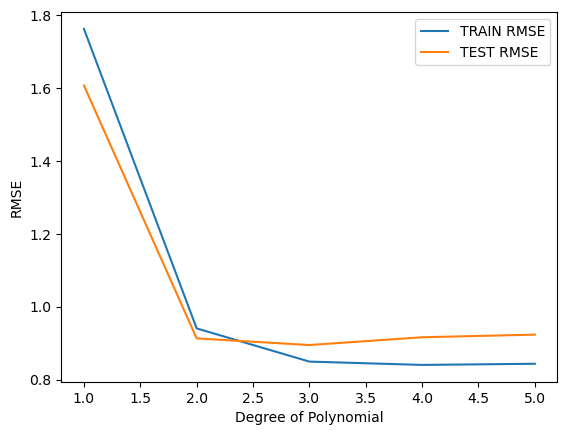

In [74]:
# Visulaize the error
plt.plot(range(1,6), train_rmse[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse[:5], label='TEST RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

**FINDING THE OPTIMAL HYPERPARAMETER TUNING USING CROSS VALIDATION (K-Fold)  using cross_validate function**

In [161]:
# Create the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Create an instance of a standard scaler for data scaler
scaler_opt = StandardScaler()

# fit transform the scaler on the training dataset
scaled_X_train = scaler_opt.fit_transform(X_train)
scaled_X_test = scaler_opt.transform(X_test)

In [162]:
# creating the first model
model_one = Ridge(alpha=100)

In [163]:
# create the instance to find the best score
cross_validate_score_one = cross_validate(model_one, scaled_X_train, y_train,
                                     scoring=['neg_mean_squared_error','neg_mean_absolute_error'],
                                     cv=10)

In [164]:
cross_validate_score_one

{'fit_time': array([0.00499654, 0.00297308, 0.00299668, 0.00399876, 0.0030148 ,
        0.00299716, 0.00299883, 0.00399637, 0.01399183, 0.00199771]),
 'score_time': array([0.00501442, 0.00299621, 0.00299811, 0.00199699, 0.00198507,
        0.00399756, 0.00199914, 0.00399709, 0.00300002, 0.00100088]),
 'test_neg_mean_squared_error': array([ -6.06067062, -10.62703078,  -3.99342608,  -5.00949402,
         -9.14179955, -13.08625636,  -3.83940454,  -9.05878567,
         -9.05545685,  -5.77888211]),
 'test_neg_mean_absolute_error': array([-1.8102116 , -2.54195751, -1.46959386, -1.86276886, -2.52069737,
        -2.45999491, -1.45197069, -2.37739501, -2.44334397, -1.89979708])}

In [165]:
cross_validate_score_one = pd.DataFrame(cross_validate_score)

In [166]:
cross_validate_score_one

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.004000,0.005995,-2.962508,-1.457174
1,0.002994,0.002999,-3.057378,-1.555308
2,0.003999,0.003997,-2.173740,-1.238770
3,0.002999,0.003999,-0.833034,-0.768938
4,0.003000,0.003997,-3.464018,-1.434489
5,0.002998,0.003996,-8.232647,-1.494316
6,0.003000,0.002998,-1.905864,-1.081362
7,0.004997,0.002997,-2.765048,-1.250011
8,0.004000,0.002998,-4.989505,-1.580971
9,0.005999,0.011004,-2.846438,-1.223326


In [167]:
cross_validate_score_one.mean()

fit_time                        0.003799
score_time                      0.004498
test_neg_mean_squared_error    -3.323018
test_neg_mean_absolute_error   -1.308467
dtype: float64

In [168]:
model_two = Ridge(alpha=1)

In [169]:
cross_validate_score_two = cross_validate(model_two, scaled_X_train, y_train,
                                     scoring=['neg_mean_squared_error','neg_mean_absolute_error'],
                                     cv=10)

In [170]:
cross_validate_score_two

{'fit_time': array([0.00499368, 0.0039978 , 0.00499606, 0.00299716, 0.00299621,
        0.00600338, 0.00299859, 0.00299811, 0.00199795, 0.00599694]),
 'score_time': array([0.00399637, 0.00399709, 0.00299907, 0.00299811, 0.00200033,
        0.00498915, 0.00499916, 0.00299764, 0.00200009, 0.00400019]),
 'test_neg_mean_squared_error': array([-2.96250773, -3.05737833, -2.1737403 , -0.83303438, -3.46401792,
        -8.2326467 , -1.90586431, -2.76504844, -4.98950515, -2.84643818]),
 'test_neg_mean_absolute_error': array([-1.45717399, -1.5553078 , -1.23877012, -0.76893775, -1.43448944,
        -1.4943158 , -1.08136203, -1.25001123, -1.58097132, -1.22332553])}

In [171]:
cross_validate_score_two = pd.DataFrame(cross_validate_score)

In [172]:
cross_validate_score_two

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.004000,0.005995,-2.962508,-1.457174
1,0.002994,0.002999,-3.057378,-1.555308
2,0.003999,0.003997,-2.173740,-1.238770
3,0.002999,0.003999,-0.833034,-0.768938
4,0.003000,0.003997,-3.464018,-1.434489
5,0.002998,0.003996,-8.232647,-1.494316
6,0.003000,0.002998,-1.905864,-1.081362
7,0.004997,0.002997,-2.765048,-1.250011
8,0.004000,0.002998,-4.989505,-1.580971
9,0.005999,0.011004,-2.846438,-1.223326


In [173]:
cross_validate_score_two.mean()

fit_time                        0.003799
score_time                      0.004498
test_neg_mean_squared_error    -3.323018
test_neg_mean_absolute_error   -1.308467
dtype: float64

**Model with alpha = 1 seems to perform better**

**  **

**CREATE THE FINAL MODEL**

In [174]:
final_model = Ridge(alpha=1)

In [175]:
final_model.fit(scaled_X_train,y_train)

Ridge(alpha=1)

In [176]:
# obtain the model coefficient
final_model.coef_

array([3.73961770e+00, 2.74477719e+00, 2.68837098e-03])

In [177]:
# predict on the scaled test data
prediction = final_model.predict(scaled_X_test)

In [178]:
prediction

array([15.73544249, 19.56177685, 11.47282584, 16.99614361,  9.19583919,
        7.06034338, 20.24078477, 17.27047482,  9.7997058 , 19.18969381,
       12.40827613, 13.88321006, 13.72330625, 21.24960621, 18.41451801,
       10.00739858, 15.54023734,  7.72694272,  7.59886443, 20.3595504 ,
        7.831815  , 18.21607253, 24.61611392, 22.77116018,  8.0117733 ,
       12.667102  , 21.40567156,  8.10250725, 12.43158049, 12.53481984,
       10.81678067, 19.21537816, 10.09192883,  6.76998079, 17.29636618,
        7.81497124,  9.28808588,  8.31202002, 10.6122371 , 10.6533735 ,
       13.05491413,  9.80364168, 10.24764859,  8.09836046, 11.58209801,
       10.10783927,  9.025001  , 16.24936342, 13.26025422, 20.77690029,
       12.51477346, 13.96784546, 17.53696507, 11.15686875, 12.57233878,
        5.56009018, 23.21824128, 12.62301353, 18.72931877, 15.18197827])

In [179]:
# Evalaute the error metrics
MAE = mean_absolute_error(y_test, prediction)
MSE = mean_squared_error(y_test, prediction)
RMSE = np.sqrt(MSE)

In [180]:
MAE

1.2168768443580582

In [181]:
MSE

2.3190215794287514

In [182]:
RMSE

1.5228334050147283

In [183]:
testing = final_model.fit(X,y)

In [157]:
testing

Ridge(alpha=1)

In [184]:
final_model.predict([[78,54,13.8]])

C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([16.67466403])